# 골프장 계절, 및 지역 분석

## 사용라이브러리

In [2]:
import pandas as pd
import numpy as np
import copy
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'

## 사용데이터

In [4]:
# df = pd.read_csv('골프장데이터ver_date_0223.csv')
# df.head(3)

C:\Users\alsdn\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (6,9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,골프장명,골프장지역명,골프장멤버십값,골프장유형값,사용일자,사용시간값,사용유형명,거주자금액,비거주자금액,결제수단명,...,예약자사용성향값,통화일자,통화시간,해당년도,"통화,사용일자년도",계절,월,시간대,사용일월,통화사용월일
0,해비치CC,동부권,회원제+대중제,36,202101.0,815.0,SKY,170000.0,170000.0,현장결제,...,NaN,NaN,NaN,2021.0,2021,겨울,1월,아침,20210120.0,20210531.0
1,아덴힐GC,서부권,대중제,18,202101.0,809.0,왕이메,90000.0,135000.0,현장결제,...,NaN,NaN,NaN,2021.0,2021,겨울,1월,아침,20210121.0,20210706.0
2,아덴힐GC,서부권,대중제,18,202101.0,823.0,왕이메,90000.0,135000.0,현장결제,...,NaN,NaN,NaN,2021.0,2021,겨울,1월,아침,20210126.0,20210706.0


## 계절별 칼럼 추가하기
- 겨울 12 , 1 ,2 봄 3,4,5 여름 6,7,8 가을 9,10,11

In [174]:
df['계절']='사계절' ## 빈칼럼 새성 

In [175]:
df.head(3)

,골프장명,골프장지역명,골프장멤버십값,골프장유형값,사용일자,사용시간값,사용유형명,거주자금액,비거주자금액,결제수단명,...,예약자거주지값,예약자평균값,예약자골프경력값,예약자평균사용값,예약자사용성향값,통화일자,통화시간,해당년도,"통화,사용일자년도",계절
0,해비치CC,동부권,회원제+대중제,36,202101.0,815.0,SKY,170000.0,170000.0,현장결제,...,비도민,8,NaN,NaN,NaN,NaN,NaN,2021.0,2021,사계절
1,아덴힐GC,서부권,대중제,18,202101.0,809.0,왕이메,90000.0,135000.0,현장결제,...,비도민,8,NaN,NaN,NaN,NaN,NaN,2021.0,2021,사계절
2,아덴힐GC,서부권,대중제,18,202101.0,823.0,왕이메,90000.0,135000.0,현장결제,...,도민,14,NaN,NaN,NaN,NaN,NaN,2021.0,2021,사계절


In [176]:
df['계절'] = df['사용일자'].apply(lambda x: '봄' if ( x%100 in [3,4,5]) else 
                                    '여름' if ( x%100 in [6,7,8]) else 
                                    '가을' if ( x%100 in [9,10,11]) else 
                                    '겨울'  if ( x%100 in [12,1,2]) else '미분류')
df.계절[df.계절=='미분류']=df['통화일자'].apply(lambda x: '봄' if ( x%100 in [3,4,5]) else 
                                    '여름' if ( x%100 in [6,7,8]) else 
                                    '가을' if ( x%100 in [9,10,11]) else 
                                    '겨울'  if ( x%100 in [12,1,2]) else '미분류')


C:\Users\alsdn\AppData\Local\Temp/ipykernel_11236/741572053.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.계절[df.계절=='미분류']=df['통화일자'].apply(lambda x: '봄' if ( x%100 in [3,4,5]) else


In [177]:
# df.to_csv('골프장데이터(계절추가).csv',index=False)

In [178]:
df.계절.value_counts()

가을    19375
여름    18410
봄      4272
겨울     3269
Name: 계절, dtype: int64

## 분석

In [189]:
df['통화,사용일자년도'].value_counts()

2021    34231
2020    11095
Name: 통화,사용일자년도, dtype: int64

<AxesSubplot:ylabel='계절'>

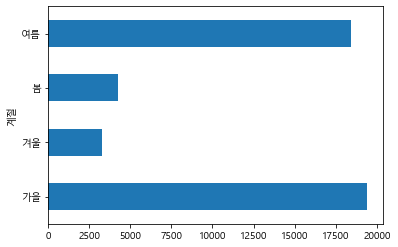

In [185]:
df.groupby(df.통,df.계절).골프장명.count().plot.barh()

## 월별 추가

In [4]:
df= pd.read_csv('골프장데이터(계절추가).csv')

C:\src\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (6,9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
df

,골프장명,골프장지역명,골프장멤버십값,골프장유형값,사용일자,사용시간값,사용유형명,거주자금액,비거주자금액,결제수단명,...,예약자거주지값,예약자평균값,예약자골프경력값,예약자평균사용값,예약자사용성향값,통화일자,통화시간,해당년도,"통화,사용일자년도",계절
0,해비치CC,동부권,회원제+대중제,36,202101.0,815.0,SKY,170000.0,170000.0,현장결제,...,비도민,8,NaN,NaN,NaN,NaN,NaN,2021.0,2021,겨울
1,아덴힐GC,서부권,대중제,18,202101.0,809.0,왕이메,90000.0,135000.0,현장결제,...,비도민,8,NaN,NaN,NaN,NaN,NaN,2021.0,2021,겨울
2,아덴힐GC,서부권,대중제,18,202101.0,823.0,왕이메,90000.0,135000.0,현장결제,...,도민,14,NaN,NaN,NaN,NaN,NaN,2021.0,2021,겨울
3,아덴힐GC,서부권,대중제,18,202101.0,809.0,왕이메,90000.0,135000.0,현장결제,...,도민,NaN,NaN,NaN,NaN,NaN,NaN,2021.0,2021,겨울
4,아덴힐GC,서부권,대중제,18,202102.0,1121.0,새별,110000.0,145000.0,현장결제,...,도민,30,NaN,NaN,NaN,NaN,NaN,2021.0,2021,겨울
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45321,제주CC,제주시권,대중제,18,NaN,NaN,NaN,NaN,NaN,NaN,...,도민,40,NaN,NaN,NaN,202106.0,103439.0,NaN,2021,여름
45322,더클래식CC,동부권,대중제,18,NaN,NaN,NaN,NaN,NaN,NaN,...,도민,NaN,1~3년,2회,골프초년생,202106.0,104114.0,NaN,2021,여름
45323,더클래식CC,동부권,대중제,18,NaN,NaN,NaN,NaN,NaN,NaN,...,도민,NaN,1~3년,2회,골프초년생,202106.0,104132.0,NaN,2021,여름
45324,더클래식CC,동부권,대중제,18,NaN,NaN,NaN,NaN,NaN,NaN,...,도민,NaN,1~3년,2회,골프초년생,202106.0,104224.0,NaN,2021,여름


In [6]:
df['월'] = df['사용일자'].apply(lambda x: f'{int(x)%100}월' if ( x%100 in [3,4,5]) else 
                                    f'{int(x)%100}월' if ( x%100 in [6,7,8]) else 
                                   f'{int(x)%100}월' if ( x%100 in [9,10,11]) else 
                                    f'{int(x)%100}월'  if ( x%100 in [12,1,2]) else '미분류')
df.월[df.월=='미분류']=df['통화일자'].apply(lambda x: f'{int(x)%100}월' if ( x%100 in [3,4,5]) else 
                                    f'{int(x)%100}월' if ( x%100 in [6,7,8]) else 
                                   f'{int(x)%100}월' if ( x%100 in [9,10,11]) else 
                                    f'{int(x)%100}월'  if ( x%100 in [12,1,2]) else '미분류')


C:\Users\alsdn\AppData\Local\Temp/ipykernel_11956/998732859.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.월[df.월=='미분류']=df['통화일자'].apply(lambda x: f'{int(x)%100}월' if ( x%100 in [3,4,5]) else


In [8]:
# df.to_csv('골프장데이터_계절_월_add.csv')

## 월별분석

In [202]:
df.월

0        1월
1        1월
2        1월
3        1월
4        2월
         ..
45321    6월
45322    6월
45323    6월
45324    6월
45325    6월
Name: 월, Length: 45326, dtype: object

<AxesSubplot:ylabel='월'>

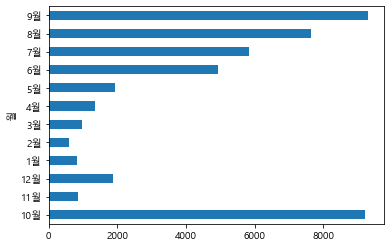

In [204]:
df.groupby(df.월).골프장명.count().plot.barh()

In [213]:
df.groupby([df.월[df.월=='10월'],df.골프장지역명]).골프장명.count()

월    골프장지역명
10월  동부권       4369
     서귀포권       470
     서부권       2406
     제주시권      1976
Name: 골프장명, dtype: int64

In [221]:
df.groupby([df.해당년도,df.월,df.골프장지역명,df.계절]).골프장명.count()

해당년도    월    골프장지역명  계절
2020.0  10월  동부권     가을    1374
             서귀포권    가을      86
             서부권     가을     536
        11월  동부권     가을     602
             서부권     가을      80
                           ... 
2021.0  8월   서부권     여름    1804
             제주시권    여름      97
        9월   동부권     가을     613
             서부권     가을    1938
             제주시권    가을     150
Name: 골프장명, Length: 64, dtype: int64

In [222]:
df

,골프장명,골프장지역명,골프장멤버십값,골프장유형값,사용일자,사용시간값,사용유형명,거주자금액,비거주자금액,결제수단명,...,예약자평균값,예약자골프경력값,예약자평균사용값,예약자사용성향값,통화일자,통화시간,해당년도,"통화,사용일자년도",계절,월
0,해비치CC,동부권,회원제+대중제,36,202101.0,815.0,SKY,170000.0,170000.0,현장결제,...,8,NaN,NaN,NaN,NaN,NaN,2021.0,2021,겨울,1월
1,아덴힐GC,서부권,대중제,18,202101.0,809.0,왕이메,90000.0,135000.0,현장결제,...,8,NaN,NaN,NaN,NaN,NaN,2021.0,2021,겨울,1월
2,아덴힐GC,서부권,대중제,18,202101.0,823.0,왕이메,90000.0,135000.0,현장결제,...,14,NaN,NaN,NaN,NaN,NaN,2021.0,2021,겨울,1월
3,아덴힐GC,서부권,대중제,18,202101.0,809.0,왕이메,90000.0,135000.0,현장결제,...,NaN,NaN,NaN,NaN,NaN,NaN,2021.0,2021,겨울,1월
4,아덴힐GC,서부권,대중제,18,202102.0,1121.0,새별,110000.0,145000.0,현장결제,...,30,NaN,NaN,NaN,NaN,NaN,2021.0,2021,겨울,2월
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45321,제주CC,제주시권,대중제,18,NaN,NaN,NaN,NaN,NaN,NaN,...,40,NaN,NaN,NaN,202106.0,103439.0,NaN,2021,여름,6월
45322,더클래식CC,동부권,대중제,18,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1~3년,2회,골프초년생,202106.0,104114.0,NaN,2021,여름,6월
45323,더클래식CC,동부권,대중제,18,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1~3년,2회,골프초년생,202106.0,104132.0,NaN,2021,여름,6월
45324,더클래식CC,동부권,대중제,18,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1~3년,2회,골프초년생,202106.0,104224.0,NaN,2021,여름,6월


## 골프경력 분석

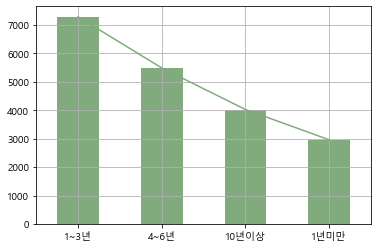

In [61]:
df.예약자골프경력값.value_counts().plot.bar(color='#81AB7D')
df.예약자골프경력값.value_counts().plot(color='#81AB7D')
plt.grid()

In [238]:
df.예약자골프경력값.value_counts()

1~3년     7290
4~6년     5490
10년이상    4027
1년미만     2962
Name: 예약자골프경력값, dtype: int64

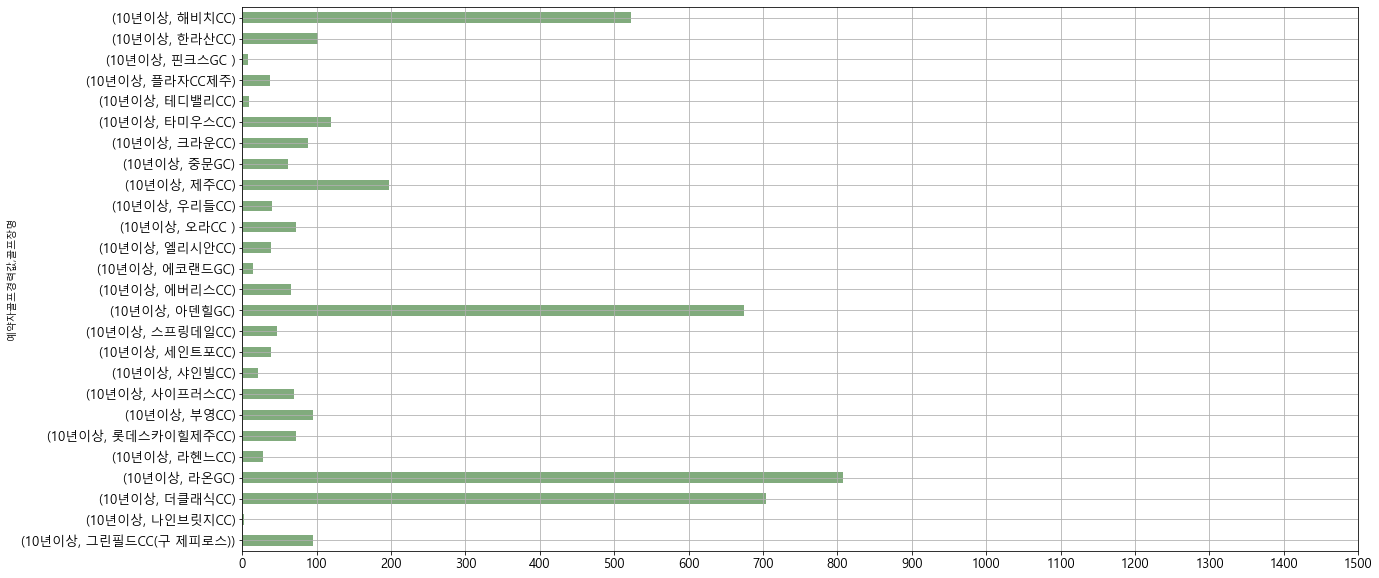

In [80]:
import matplotlib.ticker as ticker
plt.figure(figsize=(20,10))
ax=plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(100))
df.groupby([df.예약자골프경력값[df.예약자골프경력값=='10년이상'],df.골프장명]).골프장명.count().plot.barh(color='#81AB7D',fontsize=(13))
plt.xlim([0,1500])
plt.grid()
plt.savefig('10년이상사용자_현황.png', dpi=150)

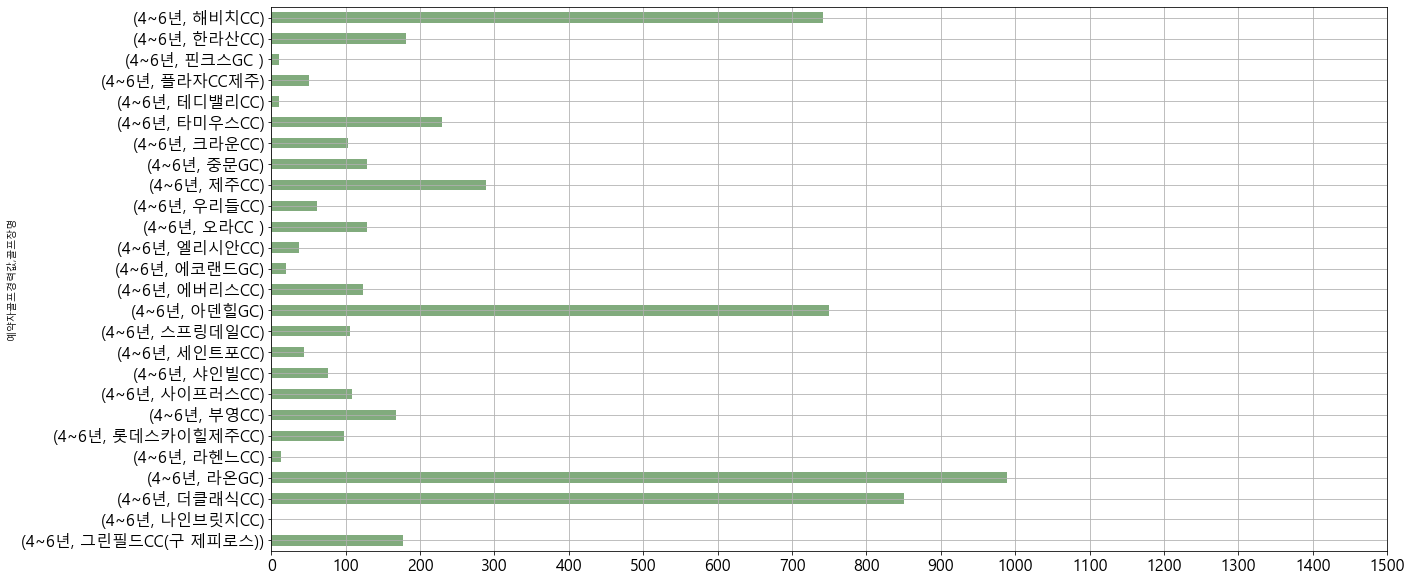

In [75]:
plt.figure(figsize=(20,10))
ax=plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(100))
df.groupby([df.예약자골프경력값[df.예약자골프경력값=='4~6년'],df.골프장명]).골프장명.count().plot.barh(color='#81AB7D',fontsize=(16))
plt.xlim([0,1500])
plt.grid()

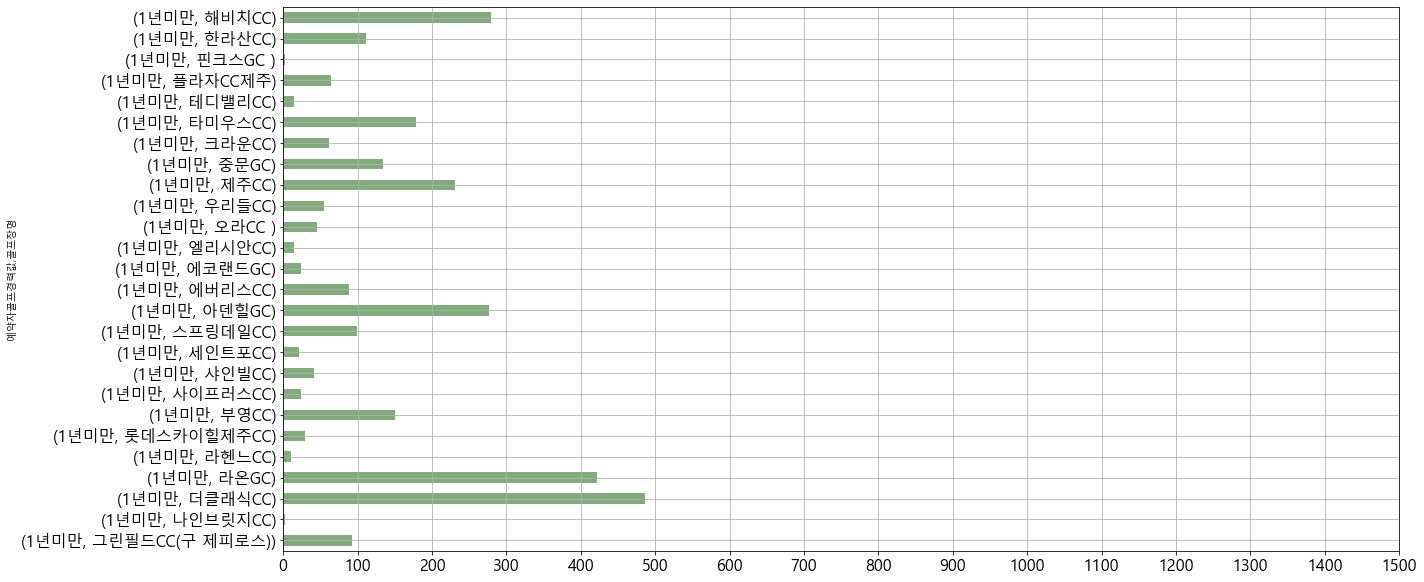

In [74]:
plt.figure(figsize=(20,10))
ax=plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(100))
df.groupby([df.예약자골프경력값[df.예약자골프경력값=='1년미만'],df.골프장명]).골프장명.count().plot.barh(color='#81AB7D',fontsize=(16))
plt.xlim([0,1500])
plt.grid()

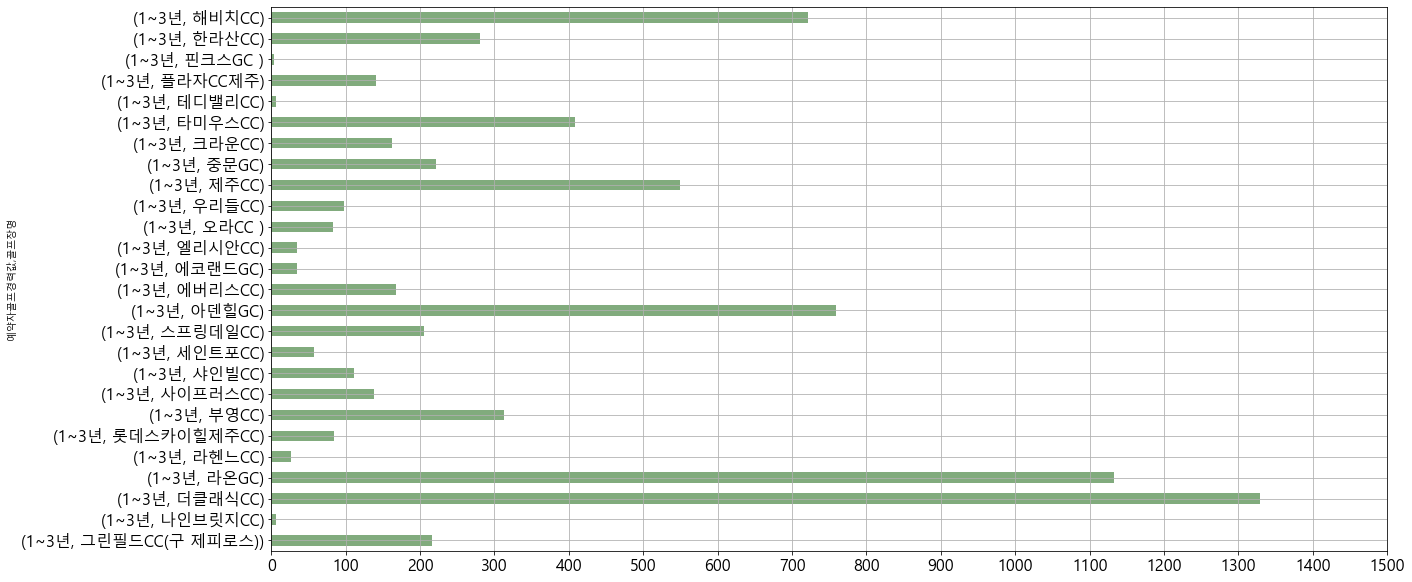

In [73]:
plt.figure(figsize=(20,10))
ax=plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(100))
df.groupby([df.예약자골프경력값[df.예약자골프경력값=='1~3년'],df.골프장명]).골프장명.count().plot.barh(color='#81AB7D',fontsize=(16))
plt.xlim([0,1500])
plt.grid()

In [112]:
df.groupby([df.예약자골프경력값[df.예약자골프경력값=='1~3년'],df.골프장명]).count().head(3)

골프장지역명  골프장멤버십값  골프장유형값  사용일자  사용시간값  사용유형명  거주자금액  \
예약자골프경력값 골프장명                                                                 
1~3년     그린필드CC(구 제피로스)     216      216     216    75     75     75     75   
         나인브릿지CC              6        6       6     0      0      0      0   
         더클래식CC            1329     1329    1329   796    796    796    796   

                         비거주자금액  결제수단명  총인원수  ...  예약자사용성향값  통화일자  통화시간  해당년도  \
예약자골프경력값 골프장명                                 ...                               
1~3년     그린필드CC(구 제피로스)      75     75    75  ...       213   141   141    75   
         나인브릿지CC              0      0     0  ...         6     6     6     0   
         더클래식CC             796    796   796  ...      1265   533   533   796   

                         통화,사용일자년도    계절     월   시간대  사용일월  통화사용월일  
예약자골프경력값 골프장명                                                       
1~3년     그린필드CC(구 제피로스)        216   216   216   216    75      75  
         나인브릿지CC                 6     6     6     6     0       0  
         더클래식CC               1329  1329  1329  1329   796     555  

[3 rows x 31 columns]

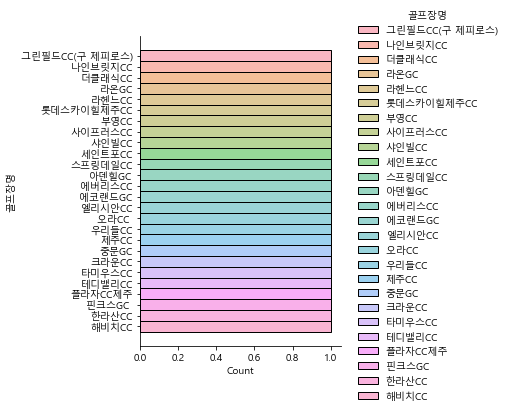

In [107]:
sns.displot(df.groupby([df.예약자골프경력값[df.예약자골프경력값=='1~3년'],df.골프장명]).count(),y='골프장명',hue='골프장명')

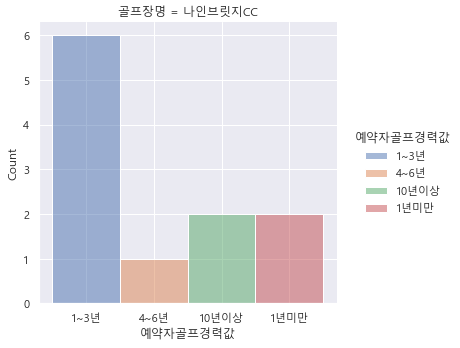

In [140]:
plt.rcParams['font.family'] = 'Malgun Gothic'
sns.displot(data=df[df.골프장명=='나인브릿지CC'], x='예약자골프경력값',col='골프장명',hue='예약자골프경력값')

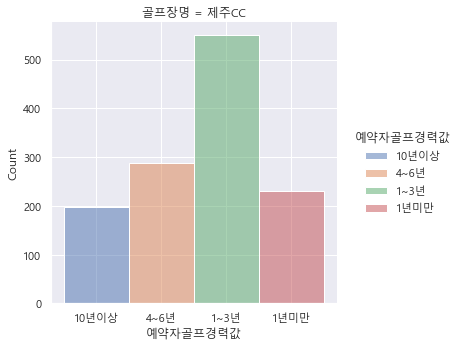

In [226]:
sns.displot(data=df[df.골프장명=='제주CC'], x='예약자골프경력값',col='골프장명',hue='예약자골프경력값')


In [232]:
df.groupby([df.골프장명,df.예약자골프경력값]).골프장명.count().max()

1329

In [ ]:
sns.displot(data=df[df.골프장명=='제주CC'], x='예약자골프경력값',col='골프장명',hue='예약자골프경력값')


C:\Users\alsdn\anaconda3\lib\site-packages\seaborn\axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


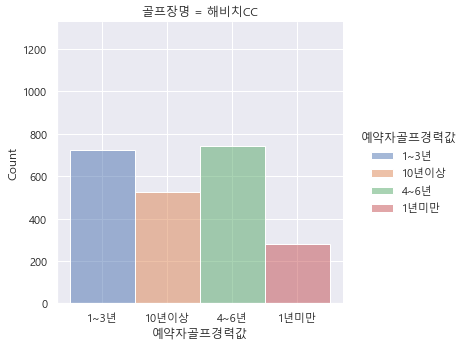

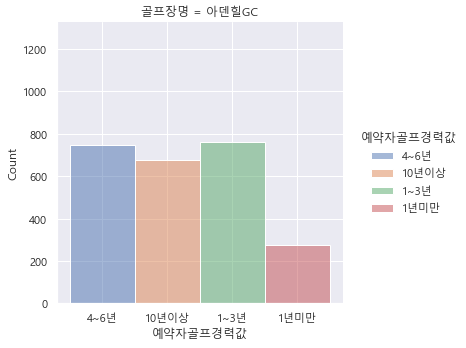

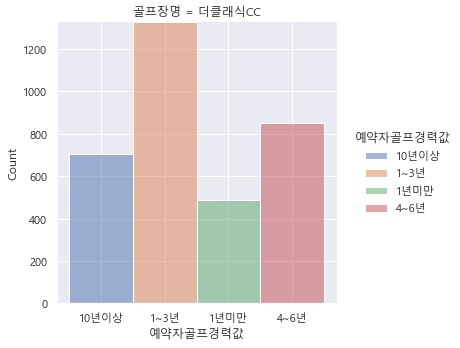

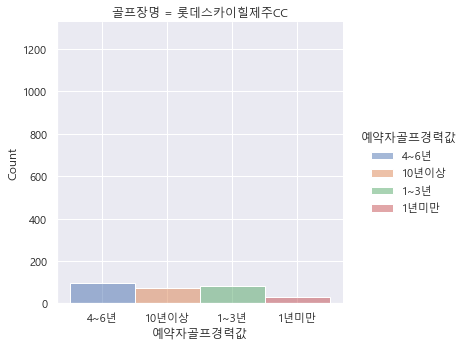

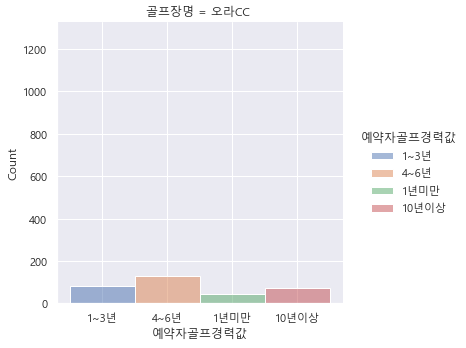

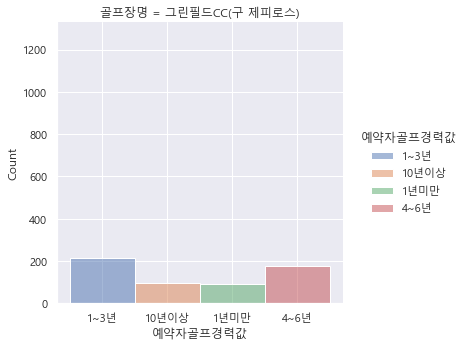

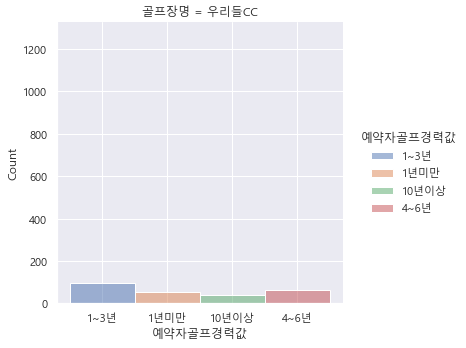

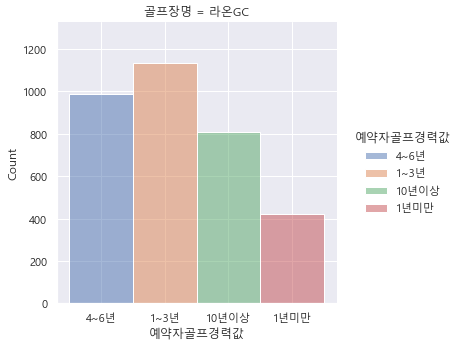

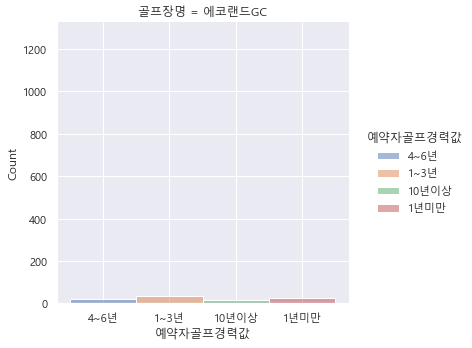

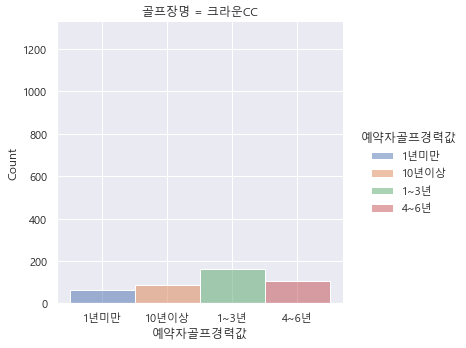

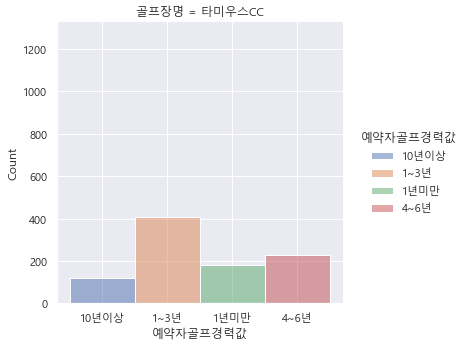

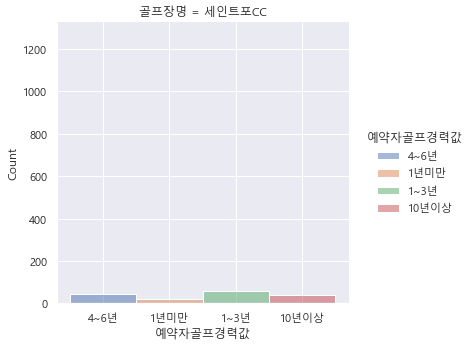

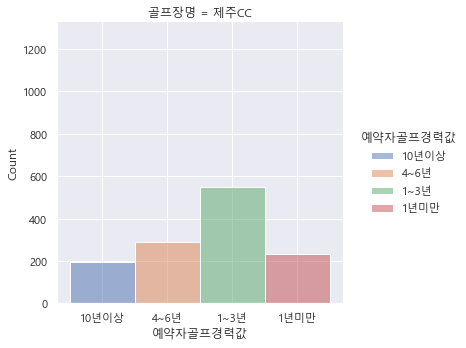

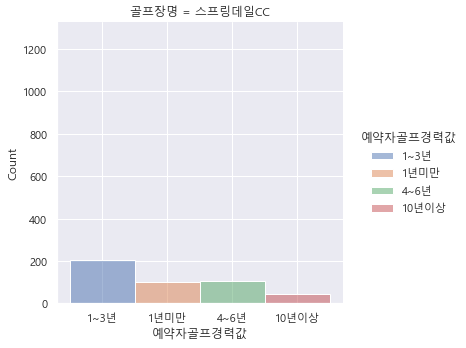

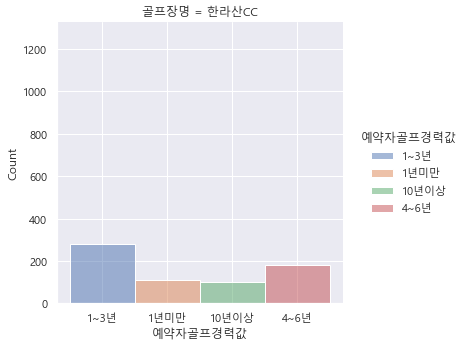

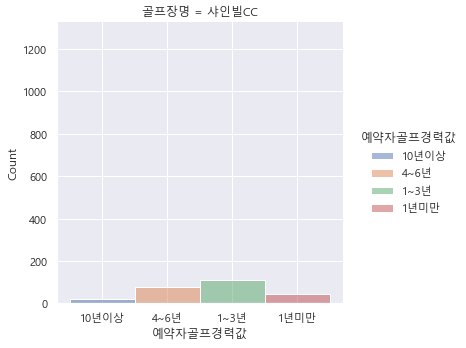

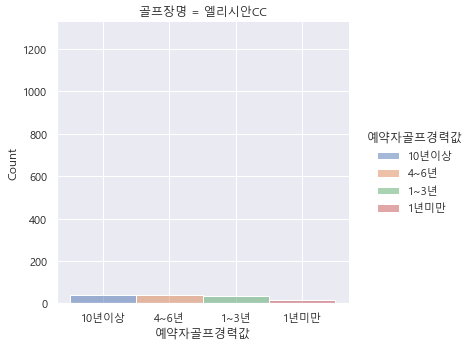

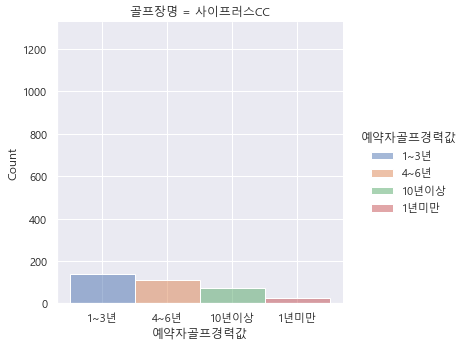

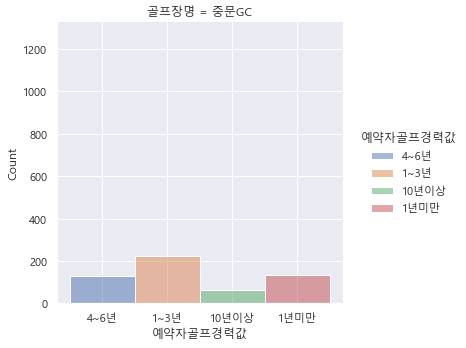

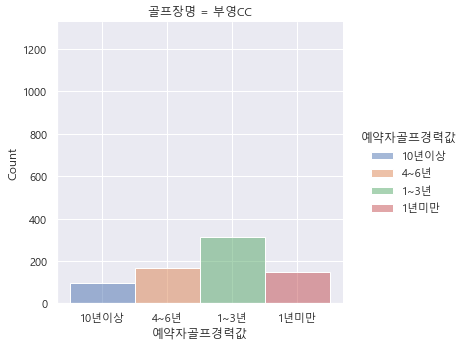

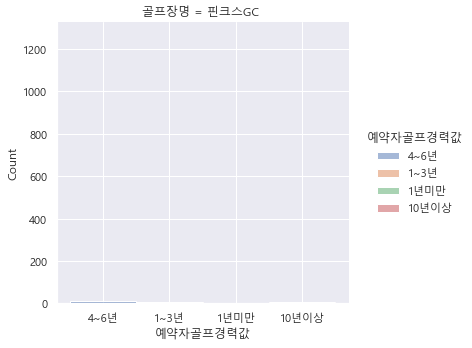

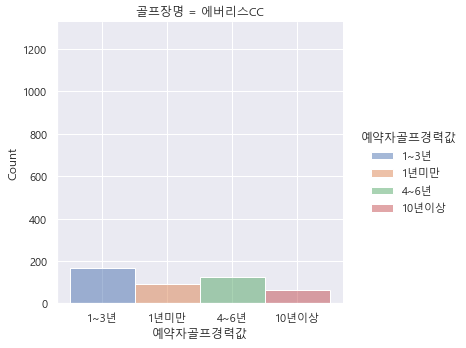

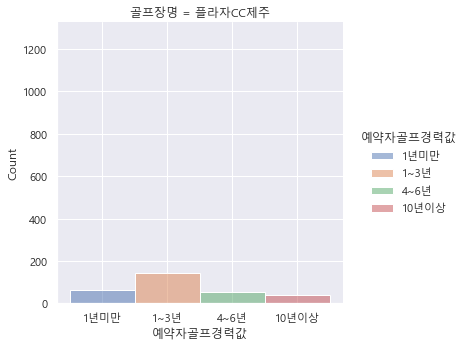

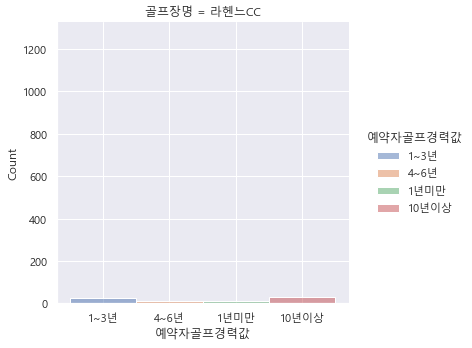

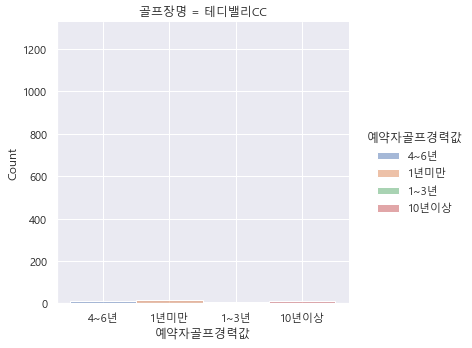

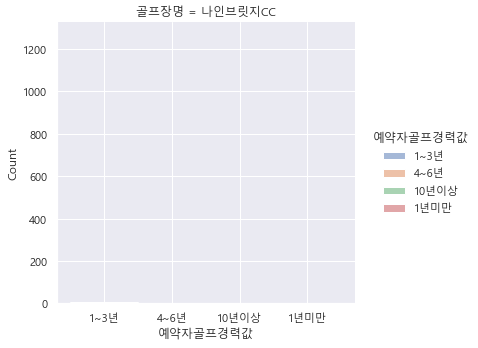

In [234]:
# fig, axes = plt.subplots(5, 6, figsize=(25,25))
for index, name in enumerate(df.골프장명.unique()):    # ['I','II','III','IV']
    sns.displot(data=df[df.골프장명==name], x='예약자골프경력값',col='골프장명',hue='예약자골프경력값')
    plt.ylim(0,df.groupby([df.골프장명,df.예약자골프경력값]).골프장명.count().max())
    ax.set_title(f'{name}경력값')
    plt.savefig(f'{name}경력.png')
# fig.suptitle("경력값에따른분석", fontsize=16)
plt.show()

In [223]:
df.groupby([df.골프장명,df.예약자골프경력값]).골프장명.count().keys()[0]

('그린필드CC(구 제피로스)', '10년이상')

In [221]:
df.groupby([df.골프장명,df.예약자골프경력값]).골프장명.count().values[0]

95

In [ ]:
df.groupby([df.골프장명,df.예약자골프경력값]).count().plot.bar()

In [ ]:
sns.displot(data=df, x='예약자골프경력값',y='골프장명',ax = axes[index//6, index%6])

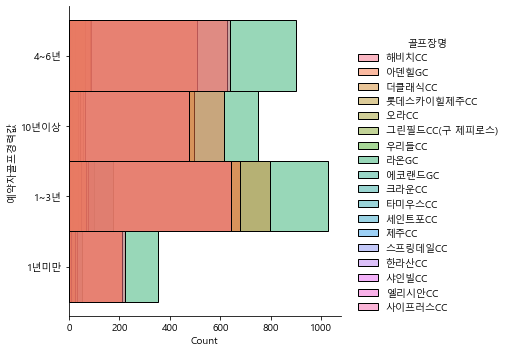

In [81]:
import seaborn as sns
sns.displot(df[df.시간대 != '미분류'], y="예약골프경력값", hue="골프장명")

## 단골 조사

In [10]:
df.예약자평균사용값.value_counts()

2회      6131
3회      4060
4회      3735
5회이상    3119
1회이하    2720
Name: 예약자평균사용값, dtype: int64

1119

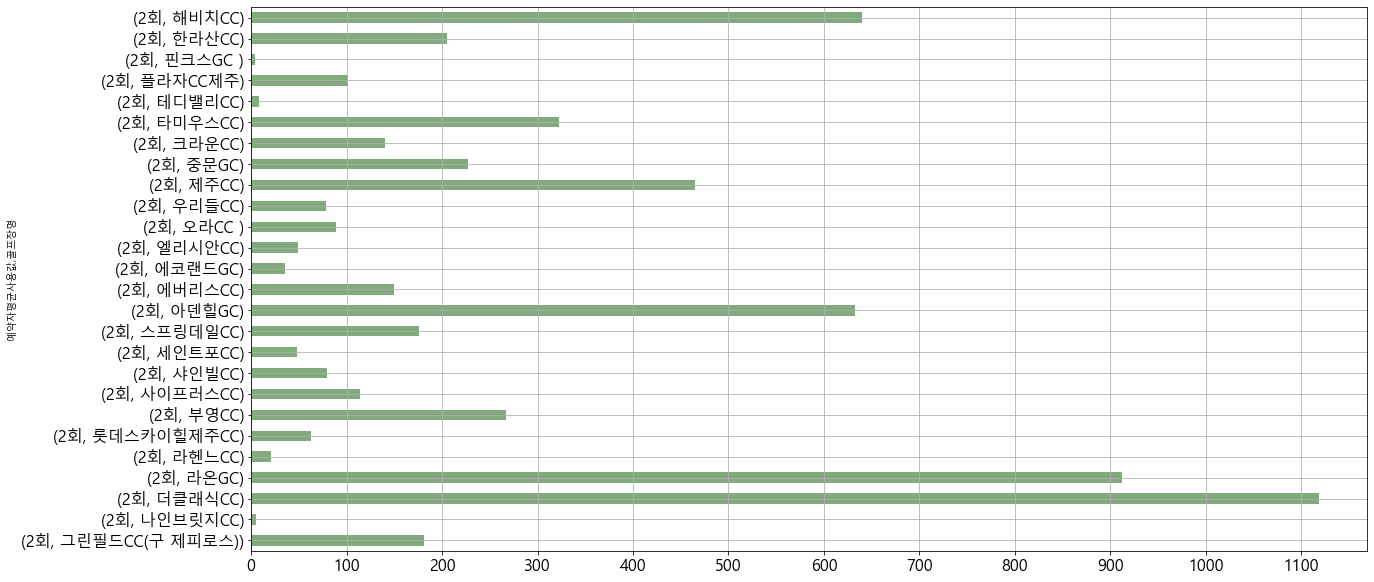

In [69]:
plt.figure(figsize=(20,10))
ax=plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(100))
df.groupby([df.예약자평균사용값[df.예약자평균사용값=='2회'],df.골프장명]).골프장명.count().plot.barh(color='#81AB7D',fontsize=(16))
plt.xlim([0,df.groupby([df.예약자평균사용값[df.예약자평균사용값=='2회'],df.골프장명]).골프장명.count().values.max()+50])
plt.grid()

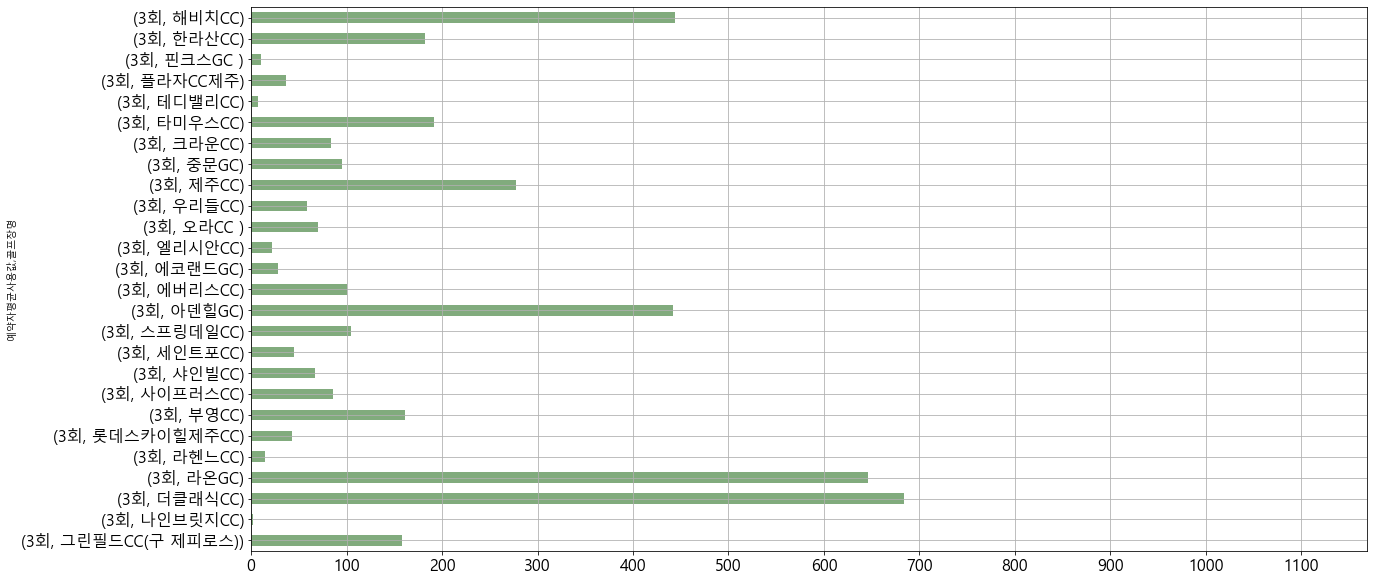

In [70]:
plt.figure(figsize=(20,10))
ax=plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(100))
df.groupby([df.예약자평균사용값[df.예약자평균사용값=='3회'],df.골프장명]).골프장명.count().plot.barh(color='#81AB7D',fontsize=(16))
plt.xlim([0,df.groupby([df.예약자평균사용값[df.예약자평균사용값=='2회'],df.골프장명]).골프장명.count().values.max()+50])
plt.grid()

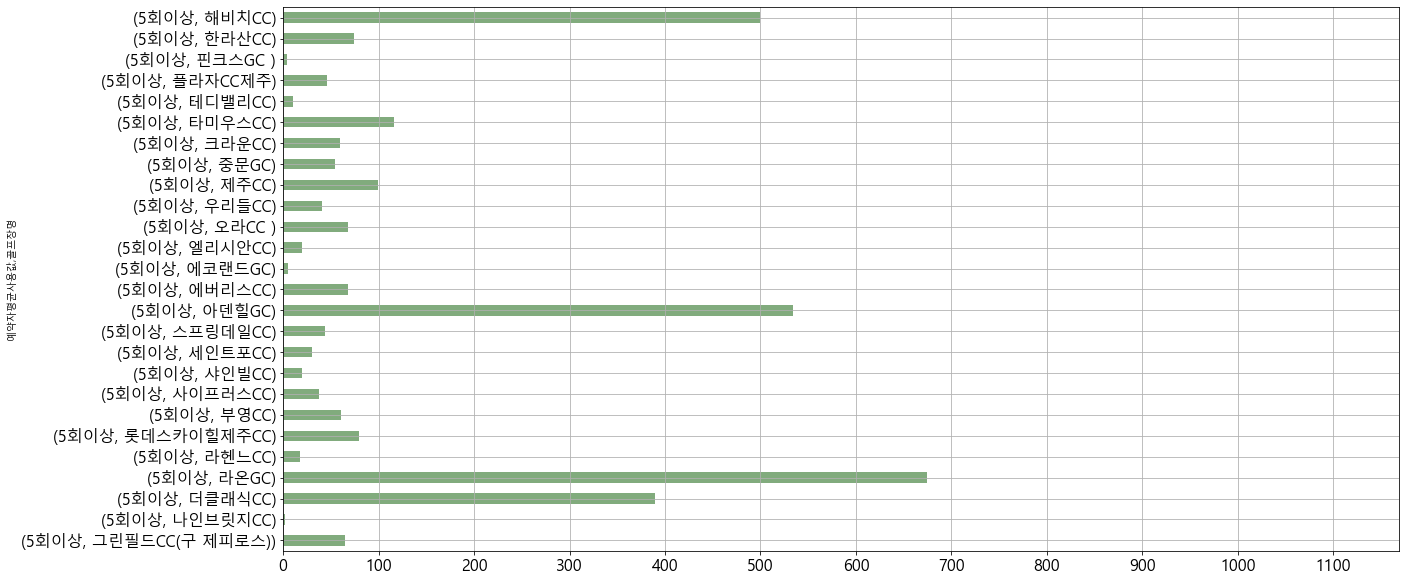

In [71]:
plt.figure(figsize=(20,10))
ax=plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(100))
df.groupby([df.예약자평균사용값[df.예약자평균사용값=='5회이상'],df.골프장명]).골프장명.count().plot.barh(color='#81AB7D',fontsize=(16))
plt.xlim([0,df.groupby([df.예약자평균사용값[df.예약자평균사용값=='2회'],df.골프장명]).골프장명.count().values.max()+50])
plt.grid()

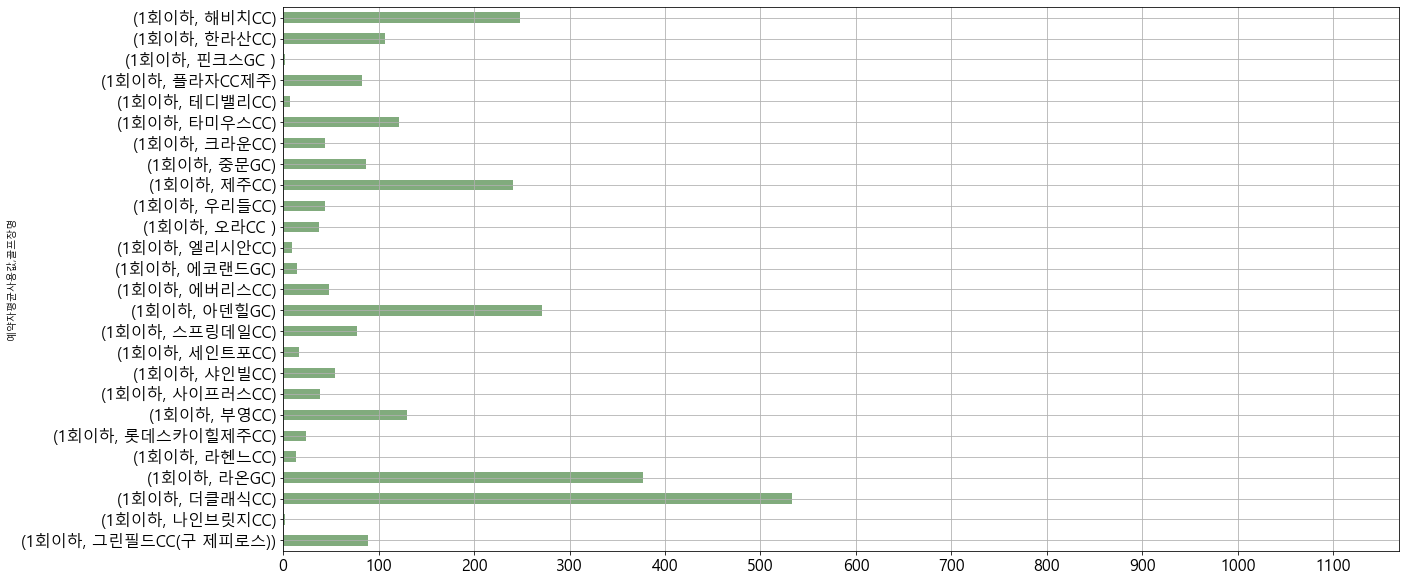

In [72]:
plt.figure(figsize=(20,10))
ax=plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(100))
df.groupby([df.예약자평균사용값[df.예약자평균사용값=='1회이하'],df.골프장명]).골프장명.count().plot.barh(color='#81AB7D',fontsize=(16))
plt.xlim([0,df.groupby([df.예약자평균사용값[df.예약자평균사용값=='2회'],df.골프장명]).골프장명.count().values.max()+50])
plt.grid()

In [254]:
df.예약자평균사용값.unique()[2]

'3회'

In [253]:
df.예약자평균사용값.unique()[1]

'5회이상'

In [250]:
df.예약자평균사용값.unique()[3]

'2회'

In [247]:
df.예약자평균사용값.unique()[5]

'1회이하'

In [248]:
df.예약자평균사용값.unique()[4]

'4회'

In [255]:
num_list=[5,3,2,4,1]

In [256]:
num_list

[5, 3, 2, 4, 1]

In [257]:
df.예약자평균사용값.unique()[num_list]

array(['1회이하', '2회', '3회', '4회', '5회이상'], dtype=object)

C:\Users\alsdn\anaconda3\lib\site-packages\seaborn\axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


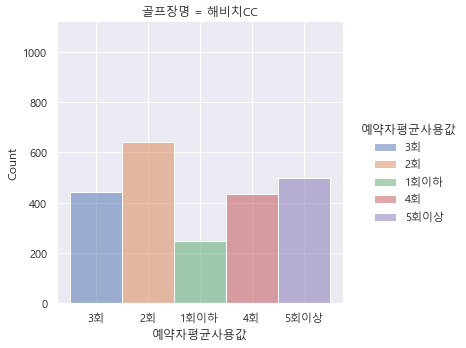

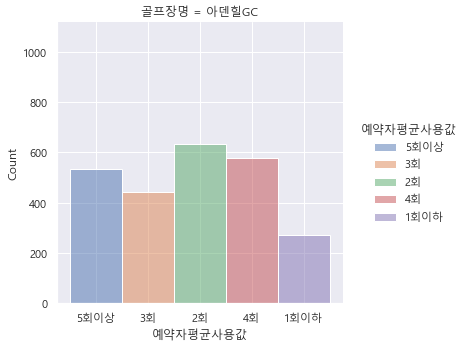

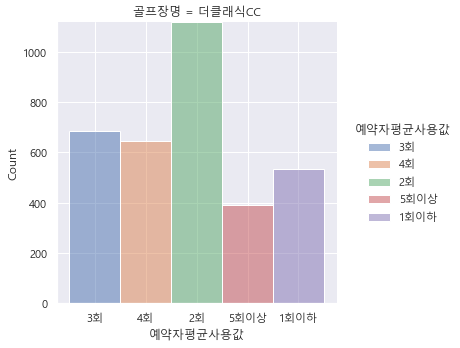

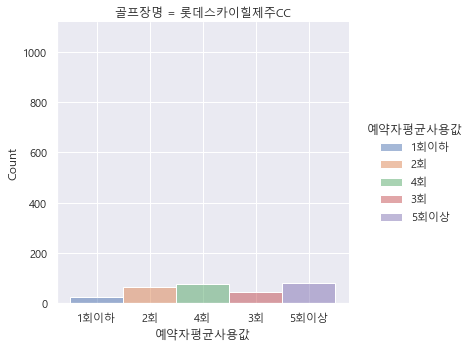

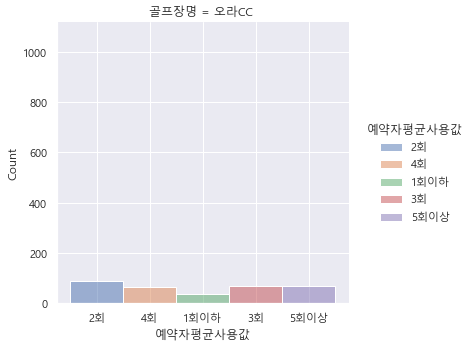

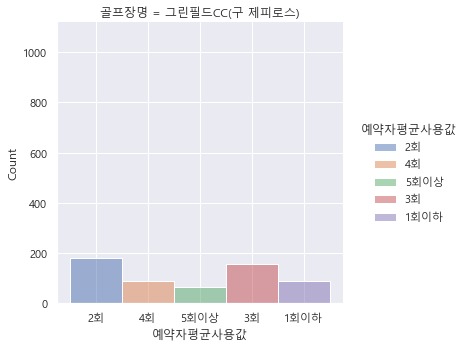

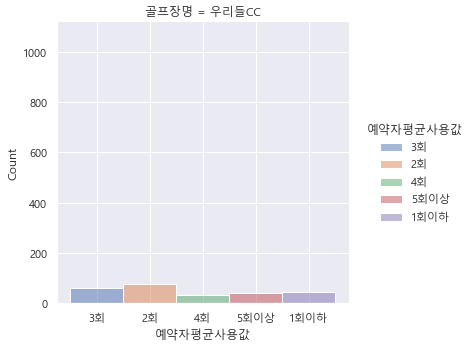

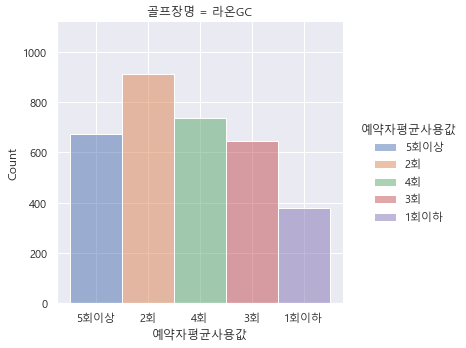

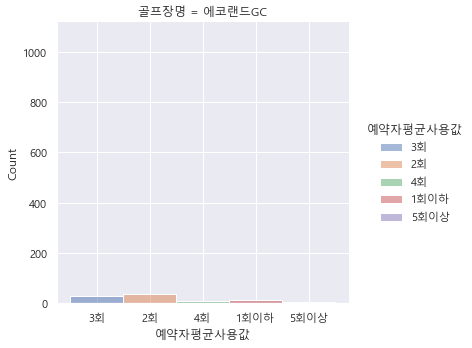

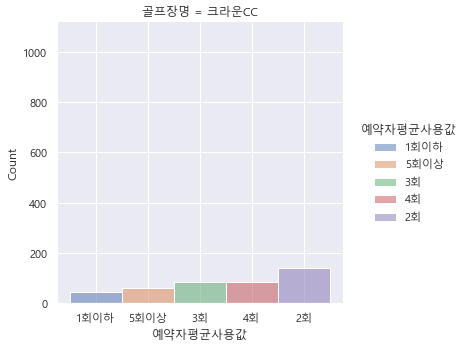

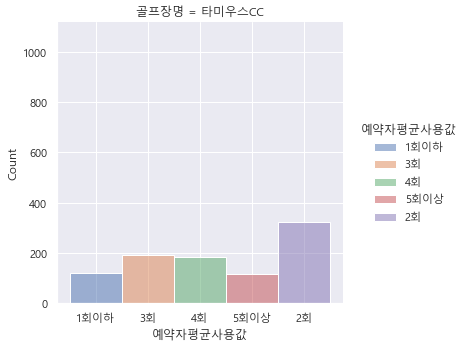

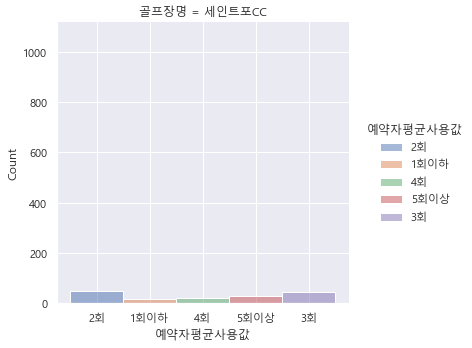

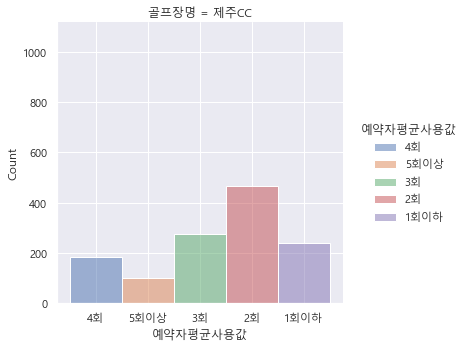

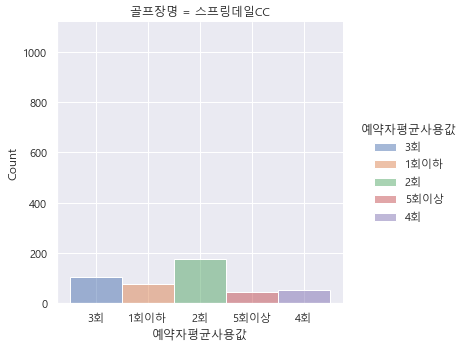

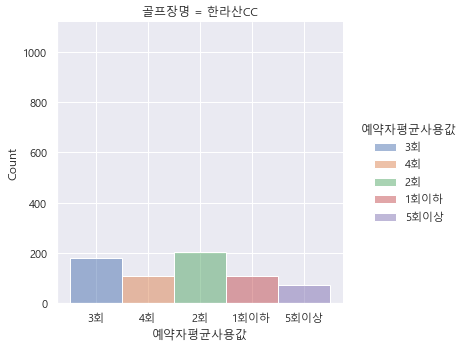

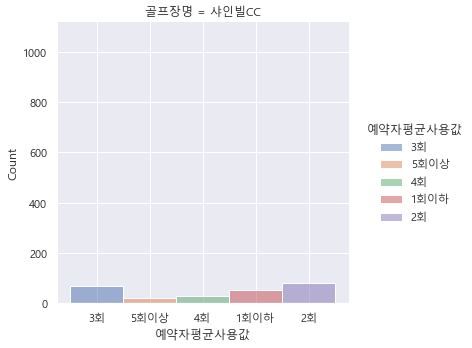

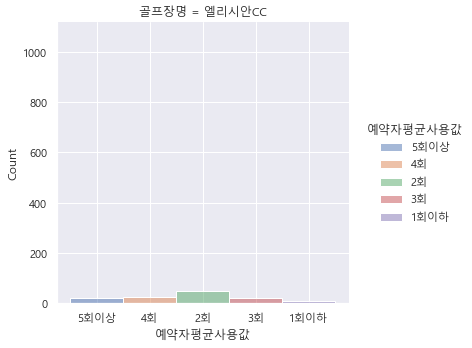

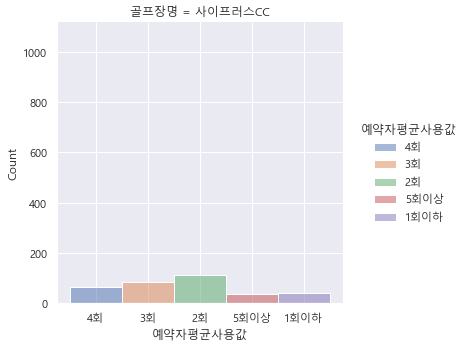

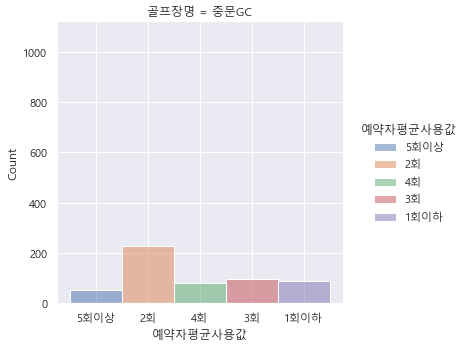

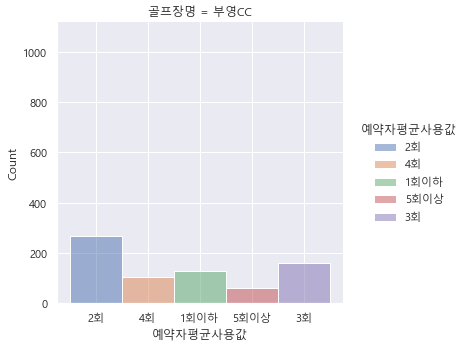

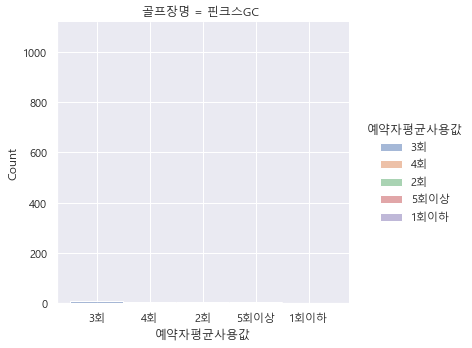

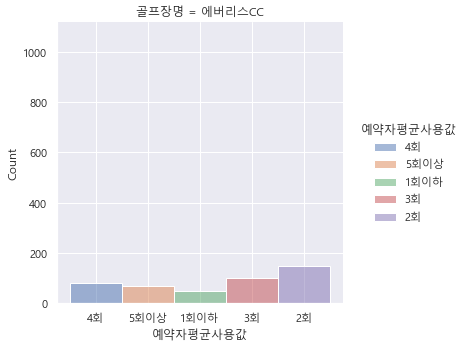

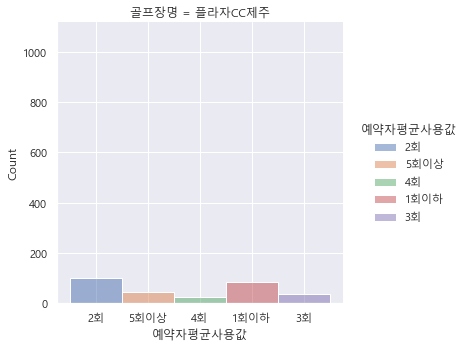

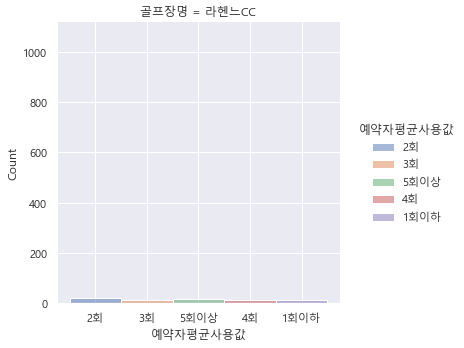

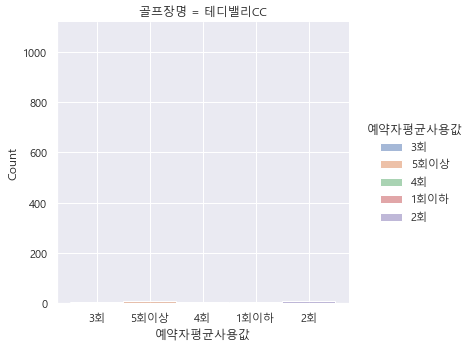

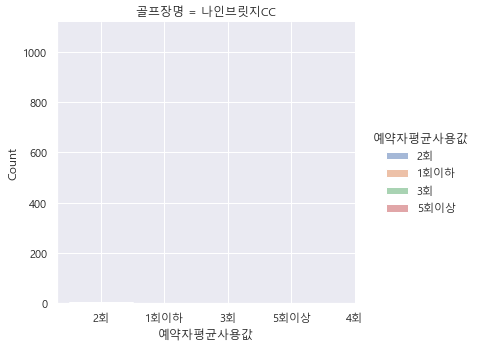

In [264]:
# fig, axes = plt.subplots(5, 6, figsize=(25,25))
for index, name in enumerate(df.골프장명.unique()):  
    sns.displot(data=df[df.골프장명==name], x='예약자평균사용값',col='골프장명',hue='예약자평균사용값')
    plt.ylim(0,df.groupby([df.골프장명,df.예약자평균사용값]).골프장명.count().max())
    ax.set_title(f'{name}예약자평균사용값')
    plt.xticks(df.예약자평균사용값.unique()[num_list])
    plt.savefig(f'{name}예약자평균사용값.png')
# fig.suptitle("경력값에따른분석", fontsize=16)
plt.show()

In [2]:
# df = pd.read_csv('골프장데이터_계절_월_add.csv')

C:\src\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (7,10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [8]:
df.사용일자.max()

202111.0

In [9]:
df.사용일자.min()

202003.0

In [11]:
df.통화일자.min()

202105.0

In [12]:
df.isnull().sum()

골프장명             0
골프장지역명           0
골프장멤버십값          0
골프장유형값           0
사용일자         18796
사용시간값        18796
사용유형명        18796
거주자금액        18796
비거주자금액       18796
결제수단명        18796
총인원수         18796
거주자인원수       18796
비거주자인원수      18796
예약일자         18796
예약시간         18796
판매업체명            0
예약자성별코드          0
예약자연령대코드     15228
예약자거주지값          0
예약자평균값       23448
예약자골프경력값     25557
예약자평균사용값     25561
예약자사용성향값     26709
통화일자         26530
통화시간         26530
해당년도         18796
통화,사용일자년도        0
계절               0
월                0
dtype: int64

In [13]:
df.columns

Index(['골프장명', '골프장지역명', '골프장멤버십값', '골프장유형값', '사용일자', '사용시간값', '사용유형명',
       '거주자금액', '비거주자금액', '결제수단명', '총인원수', '거주자인원수', '비거주자인원수', '예약일자', '예약시간',
       '판매업체명', '예약자성별코드', '예약자연령대코드', '예약자거주지값', '예약자평균값', '예약자골프경력값',
       '예약자평균사용값', '예약자사용성향값', '통화일자', '통화시간', '해당년도', '통화,사용일자년도', '계절', '월'],
      dtype='object')